# Lab 1 : Spatial Autocorrelation

In [56]:
# We import our libraries here
library(raster)
library(spdep)
library(classInt)
library(rgdal)
library(RColorBrewer)
library(ggplot2)
library(dplyr)
library(broom)

## Read in the data and take a look at it

Read the shape file from the data directory

In [68]:
auck <- readOGR("data/akCity_CAU01_ethnic.shp")

OGR data source with driver: ESRI Shapefile 
Source: "data/akCity_CAU01_ethnic.shp", layer: "akCity_CAU01_ethnic"
with 101 features
It has 14 fields
Integer64 fields read as strings:  POLY_ID SUM_EUROPE SUM_MAORI SUM_PACIFI SUM_ASIAN SUM_OTHER SUM_TOTAL 


In [69]:
# Let's see a summary of our spatial data
# summary(auck)

In [70]:
#names function gives you the header (first row) of your data
names(auck)

[1] "POLY_ID"    "CAU_ID"     "FIRST_CAU_" "SUM_EUROPE" "SUM_MAORI" 
 [6] "SUM_PACIFI" "SUM_ASIAN"  "SUM_OTHER"  "SUM_TOTAL"  "PC_EUROPEA"
[11] "PC_MAORI"   "PC_PACIFIC" "PC_ASIAN"   "PC_OTHER"

In [71]:
#The data frame -> row and header of data, in "tabular" format
#let's make df the dataframe
# df <- data.frame(auck)
# df

In [72]:
auck <- auck[,c(3,13)]
auck

class       : SpatialPolygonsDataFrame 
features    : 101 
extent      : 2658430, 2679068, 6469654, 6483715  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=nzmg +lat_0=-41 +lon_0=173 +x_0=2510000 +y_0=6023150 +datum=nzgd49 +units=m +no_defs +ellps=intl +towgs84=59.47,-5.04,187.44,0.47,-0.1,1.024,-4.5993 
variables   : 2
names       :   FIRST_CAU_, PC_ASIAN 
min values  : Abbotts Park,      3.8 
max values  :     Westmere,     37.5 

## Plotting the data on a map

### Using plot

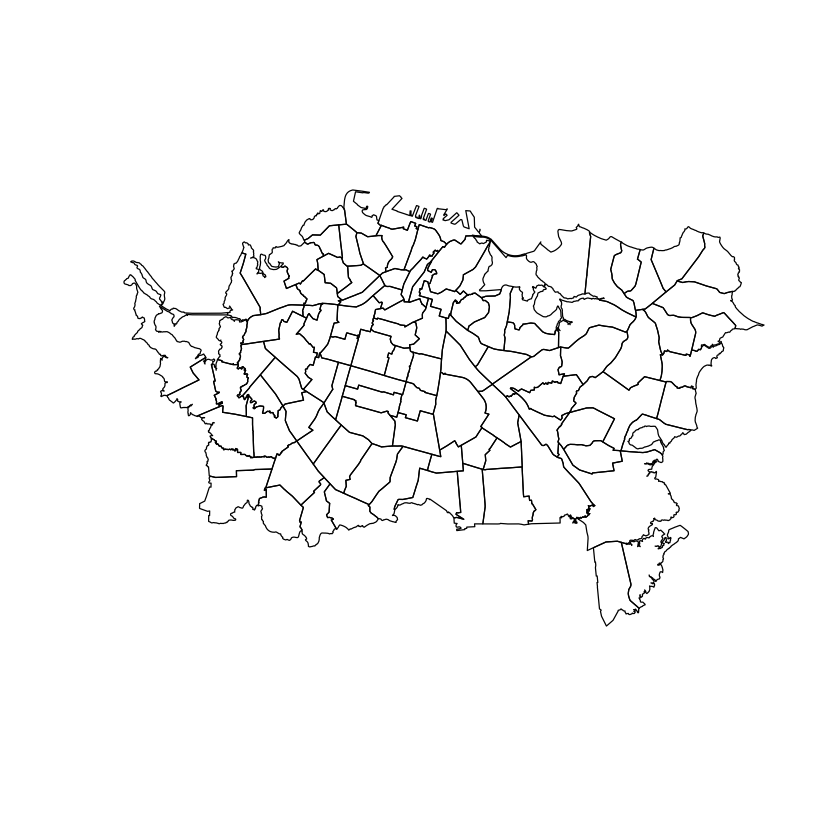

In [73]:
# Test plot the dataset using plot
plot(auck['PC_ASIAN'])

Note that the above has no color -- we need to add breaks 
to the data and do some extra work in plot to get color. Fortunately there are two libraries in R that do a lot of out of the box geospatial work

### Using spplot

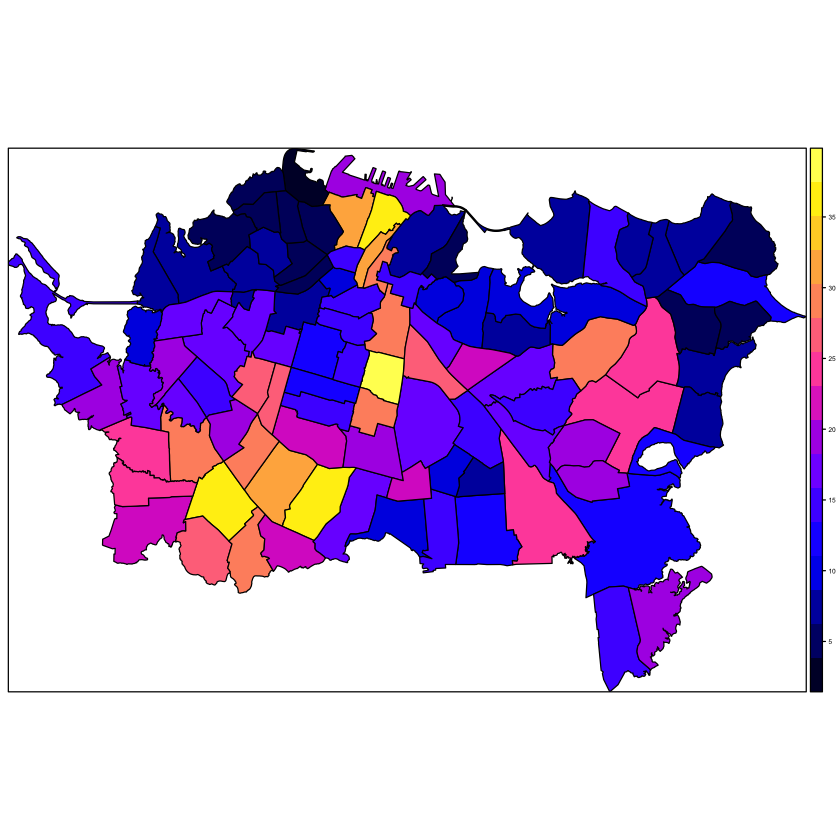

In [74]:
# We can also use spplot for this, a geospatial package for R
# spplot(data, column, legend settings)
spplot(auck, z="PC_ASIAN", par.settings=list(fontsize=list(text=5)))

## Equal Intervals Map

In [188]:
#First, let's make breaks in the data by using classIntervals()
#See https://www.rdocumentation.org/packages/classInt/versions/0.1-24/topics/classIntervals for
#Documentation of all options

# 7 breaks, since we set n=7 in options below
ci <- classIntervals(auck$PC_ASIAN, n=7, style="equal")
breaks <- ci$brks
breaks[length(breaks)] <- brks[length(breaks)] + 0.1

In [189]:
# Custom colors using brewer
pal  <- brewer.pal(length(breaks), "Blues")

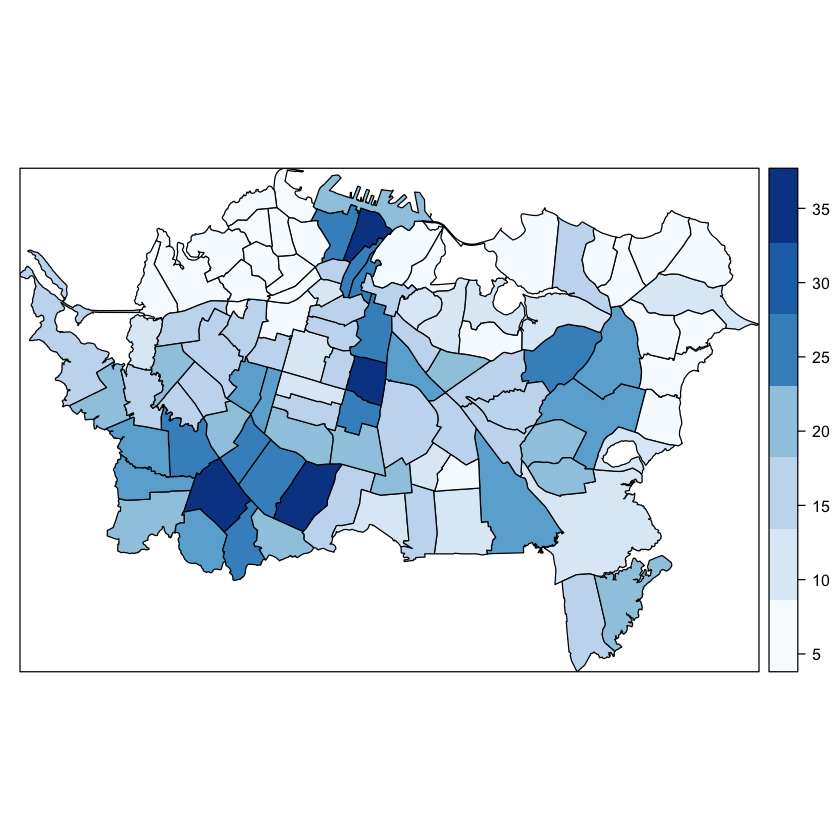

In [190]:
# Generate the map
#spplot(auck, z="PC_ASIAN", at=brks, col.regions=pal)
spplot(auck, z="PC_ASIAN", at=breaks, col.regions=pal)

## Standard Deviations Map

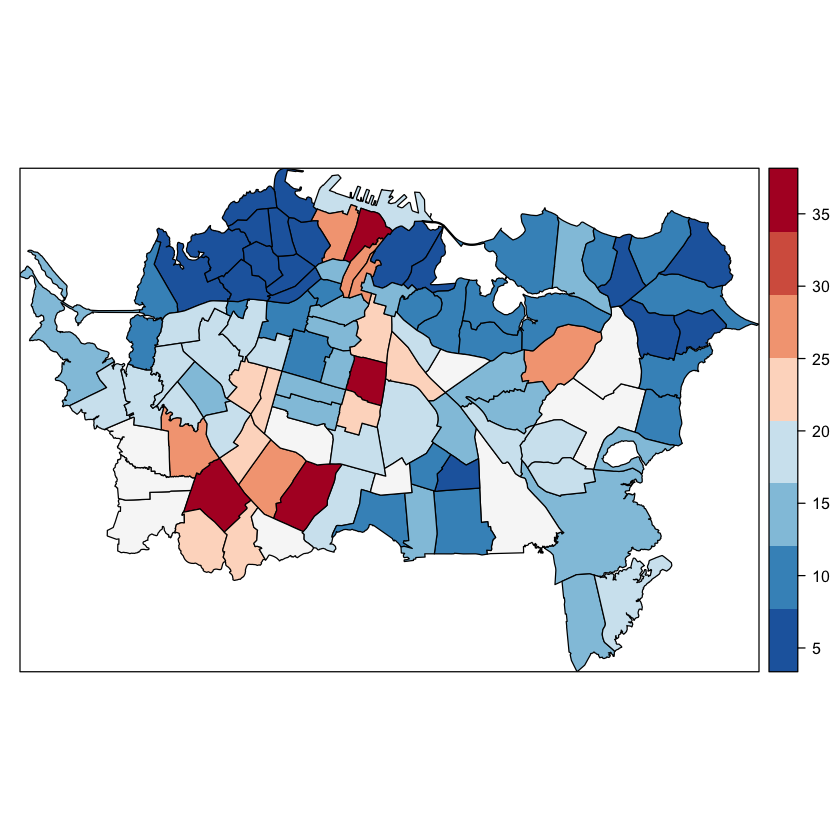

In [193]:
# Generate breaks
breaks <- classIntervals(auck$PC_ASIAN, style = "sd")$brks
breaks[length(brks)] <- breaks[length(breaks)] + 0.1
# Define color swatches
pal  <- rev(brewer.pal(length(brks), "RdBu"))

# Generate the map
spplot(auck, z="PC_ASIAN", at = breaks, col.regions=pal)

## Quantiles Map

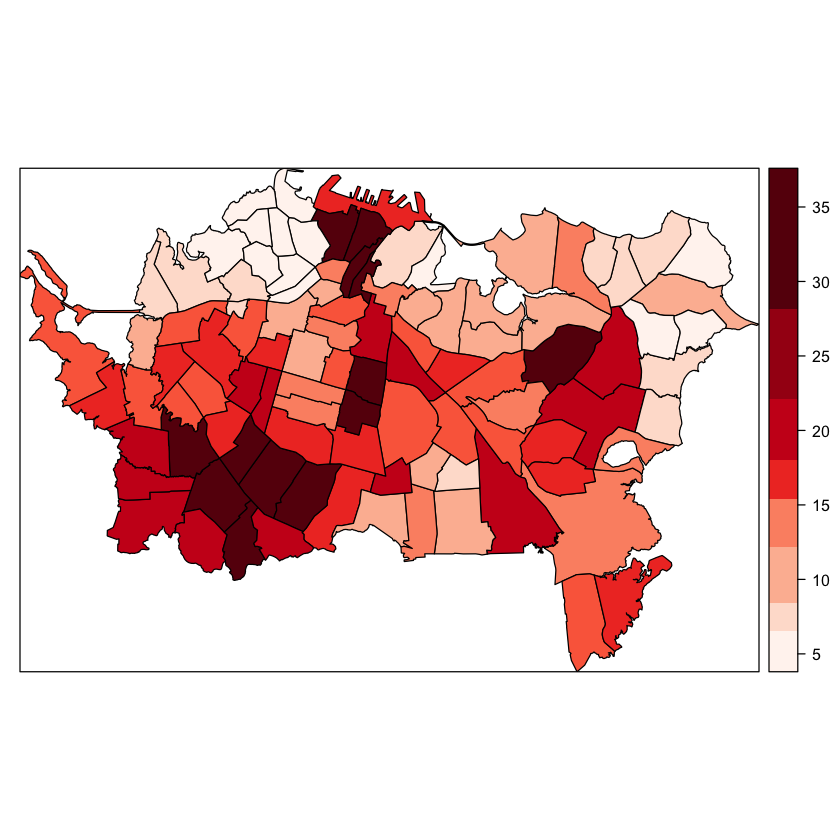

In [194]:
# Generate breaks
breaks <-  classIntervals(auck$PC_ASIAN, style = "quantile")$brks
breaks[length(brks)] <- breaks[length(breaks)] + 0.1
# Define color swatches
pal  <- brewer.pal(length(brks), "Reds")

# Generate the map
spplot(auck, z="PC_ASIAN", at = breaks, col.regions=pal)

## Natural Breaks (Jenks) map

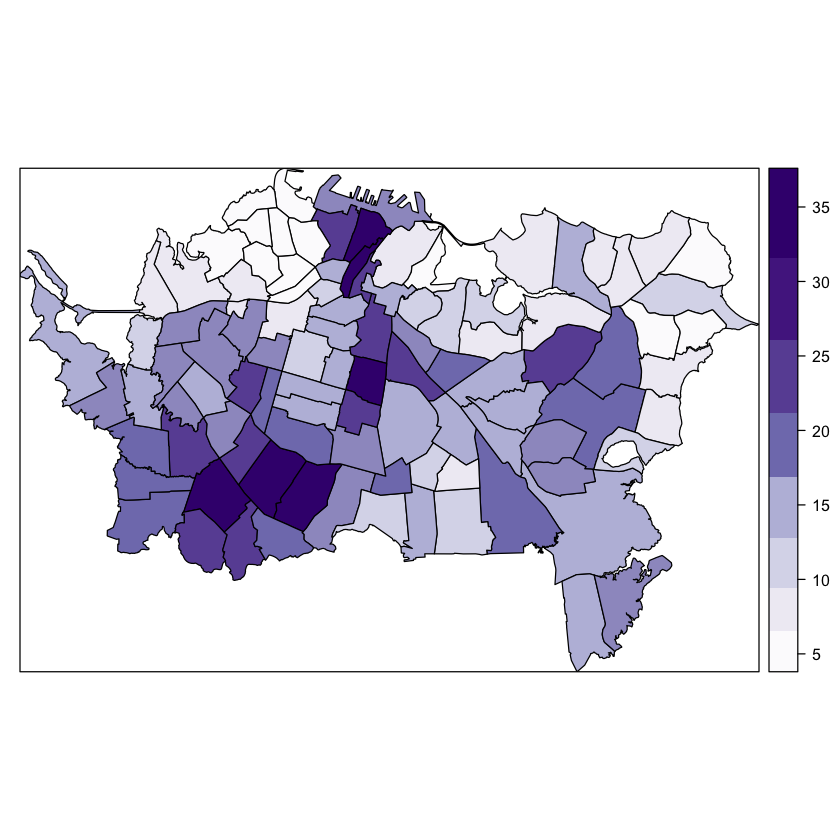

In [195]:
# Generate breaks
breaks <-  classIntervals(auck$PC_ASIAN, style = "fisher")$brks
breaks[length(brks)] <- breaks[length(breaks)] + 0.1
# Define color swatches
pal  <- brewer.pal(length(brks), "Purples")

# Generate the map
spplot(auck, z="PC_ASIAN", at = breaks, col.regions=pal)

# Graphing the data

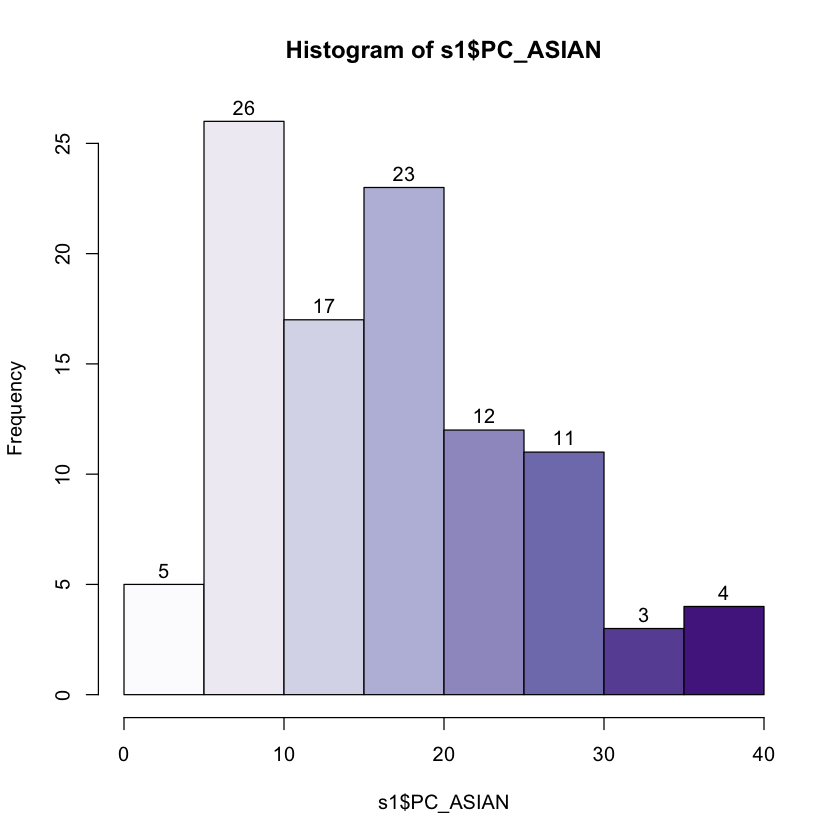

In [17]:
#brks
#s1$PC_ASIAN

hist(s1$PC_ASIAN, freq = TRUE, right=TRUE, labels=TRUE,col=pal)

# Spatial autocorrelation

In [18]:
# Generate the weight matrix
# queen = False option means at least two boundary points must be 
# within the snap distance of each other
# with the conventional name of a ‘rook’ relationship.
# The snap option is the same as precision threshold in geoda

nb <- poly2nb(s1, row.names=s1$FIRST_CAU_, queen=FALSE, snap=1e-05)
length(nb)


[1] 101

In [19]:
#example of the first polygon in w, numbers are the neighbors for the first polygon

nb[1]
s1$FIRST_CAU_[1]


#make a summary of w
summary(nb)

[[1]]
[1]  3  5 21 23 25

[1] Freemans Bay
101 Levels: Abbotts Park Akarana Arch Hill ... Westmere

Neighbour list object:
Number of regions: 101 
Number of nonzero links: 498 
Percentage nonzero weights: 4.881874 
Average number of links: 4.930693 
Link number distribution:

 2  3  4  5  6  7  8  9 
 5 12 20 30 22  7  4  1 
5 least connected regions:
Rosebank Kohimarama West Glendowie Otahuhu East Otahuhu West with 2 links
1 most connected region:
Mt Wellington North with 9 links


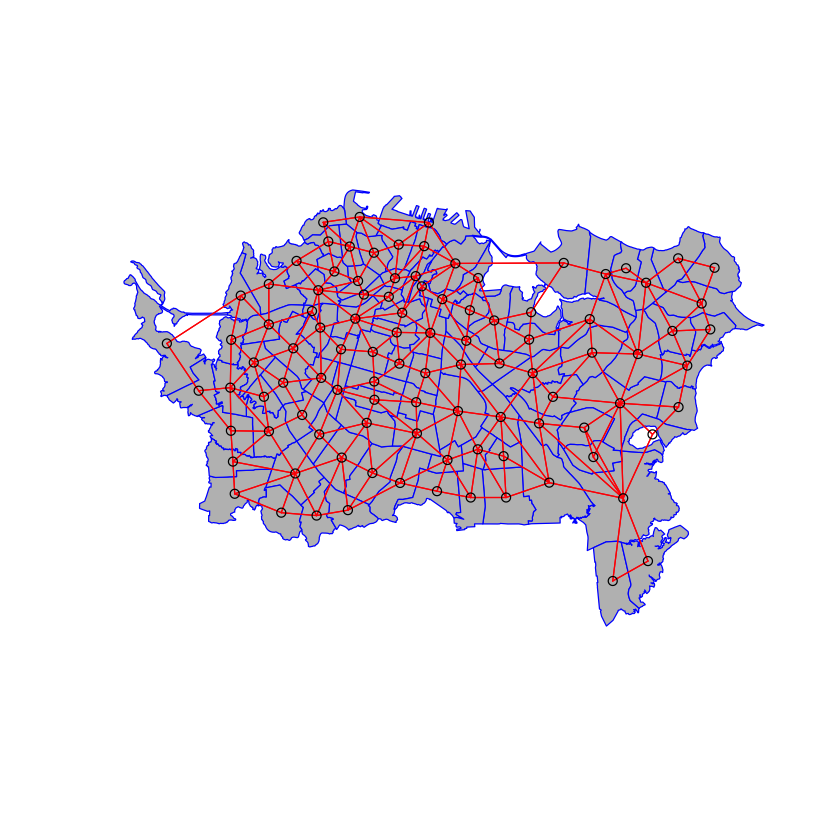

In [20]:
plot(s1, col='gray', border='blue', lwd=1)
xy <- coordinates(s1)
plot(nb, xy, col='red', lwd=1, add=TRUE)

In [21]:
#style = B indicates show the weights as binaries (0 or 1)
wm <- nb2mat(nb, style='B', zero.policy=TRUE)

In [55]:
#this is what the first few rows of the weights matrix looks like, 
# since we set style=B, values are either 0 or 1 
head(wm)

Freemans Bay,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Auckland Harbourside,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Auckland Central West,1,1,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Auckland Central East,0,1,1,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Newton,1,0,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Grafton West,0,0,0,1,1,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Moran's *I* in equation form

$I = \frac{n}{\sum_{i=1}^n (y_i - \bar{y})^2} \frac{\sum_{i=1}^n \sum_{j=1}^n w_{ij}(y_i - \bar{y})(y_j - \bar{y})}{\sum_{i=1}^n \sum_{j=1}^n w_{ij}}$

In [23]:
# Let's first see what manual computation of Moran's I looks like

#n is the number of observations (length of our dataset)
n <- length(s1)

#we set y to the column of PC_ASIAN, then we get the mean.
y <- s1$PC_ASIAN
ybar <- mean(y)

#find the difference between y and ybar(the mean)
dy <- y - ybar
yi <- rep(dy, each=n)
yj <- rep(dy)
yiyj <- yi * yj

pm <- matrix(yiyj, ncol=n)

pmw <- pm * wm

spmw <- sum(pmw)

smw <- sum(wm)
sw  <- spmw / smw
vr <- n / sum(dy^2)
MI <- vr * sw

#Morans I
cat("Moran's I is", MI)

Moran's I is 0.4833353

In [24]:
# let's make a weights object so that we 
# can use it with a less manual way of computing moran's i
lw <- nb2listw(nb, style="W", zero.policy=TRUE)
lw
length(lw)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 101 
Number of nonzero links: 498 
Percentage nonzero weights: 4.881874 
Average number of links: 4.930693 

Weights style: W 
Weights constants summary:
    n    nn  S0       S1       S2
W 101 10201 101 43.55156 414.9739

[1] 3

In [25]:
summary(lw)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 101 
Number of nonzero links: 498 
Percentage nonzero weights: 4.881874 
Average number of links: 4.930693 
Link number distribution:

 2  3  4  5  6  7  8  9 
 5 12 20 30 22  7  4  1 
5 least connected regions:
Rosebank Kohimarama West Glendowie Otahuhu East Otahuhu West with 2 links
1 most connected region:
Mt Wellington North with 9 links

Weights style: W 
Weights constants summary:
    n    nn  S0       S1       S2
W 101 10201 101 43.55156 414.9739


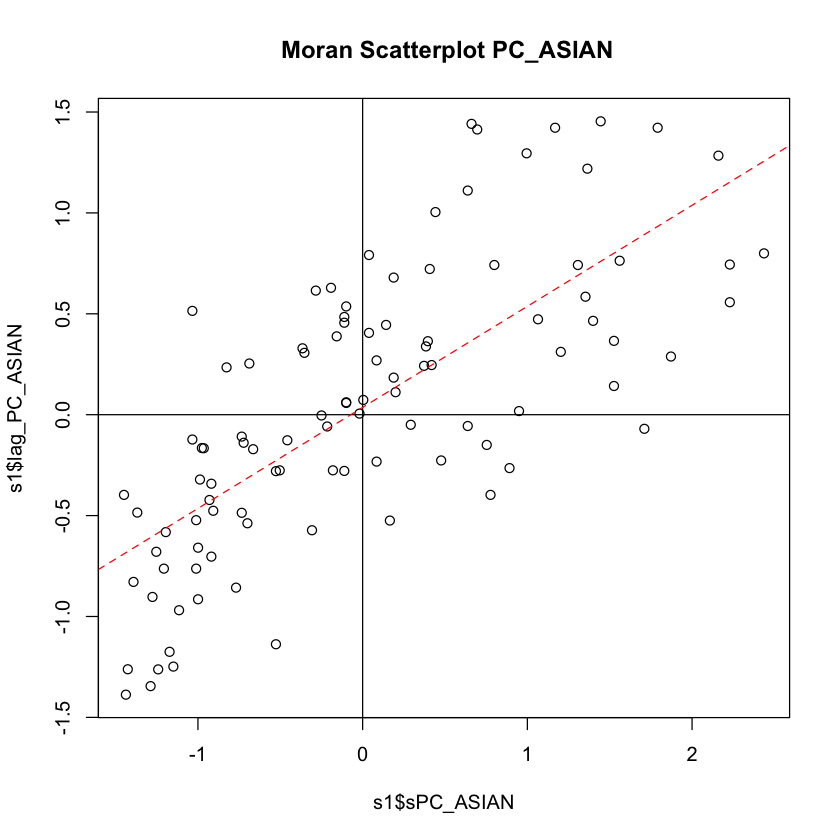

In [54]:
s1$sPC_ASIAN <- scale(s1$PC_ASIAN) 

s1$lag_PC_ASIAN <- lag.listw(lw, s1$sPC_ASIAN,zero.policy=TRUE)

plot(x=s1$sPC_ASIAN, y=s1$lag_PC_ASIAN, main = " Moran Scatterplot PC_ASIAN")
abline(h=0, v=0)
best_fit_line <- lm(s1$lag_PC_ASIAN ~ s1$sPC_ASIAN)
abline(best_fit_line, lty=2, lwd=1, col="red")

#Note that the slope of the regression line is nearly the same as Moran's I
#coefficients(best_fit_line)[2]


In [27]:
moran(s1$PC_ASIAN,lw, n=length(lw$neighbours), S0=Szero(lw))

$I
[1] 0.5007802

$K
[1] 2.385732

In [28]:
moran.test(s1$PC_ASIAN, lw, randomisation=FALSE)


	Moran I test under normality

data:  s1$PC_ASIAN  
weights: lw  

Moran I statistic standard deviate = 8.0152, p-value = 5.498e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.500780175      -0.010000000       0.004061069 


In [38]:
mmc <- moran.mc(s1$PC_ASIAN, lw, nsim=999)

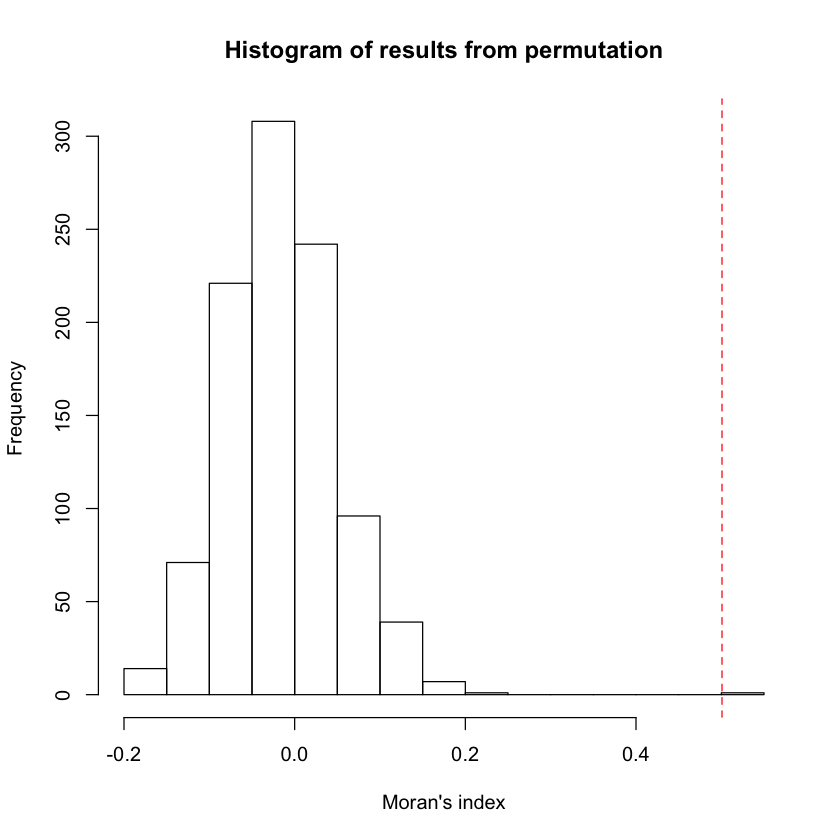

In [47]:
hist(mmc$res, main="Histogram of results from permutation", xlab="Moran's index")
abline(v=mmc$statistic, col='red', lty=2)

# Univariate Local Moran’s I

In [32]:
# We use the localmoran function instead of moran
locm <- localmoran(s1$PC_ASIAN,lw)
summary(locm)

       Ii                E.Ii           Var.Ii            Z.Ii         
 Min.   :-0.53724   Min.   :-0.01   Min.   :0.1008   Min.   :-1.44873  
 1st Qu.: 0.01269   1st Qu.:-0.01   1st Qu.:0.1562   1st Qu.: 0.05214  
 Median : 0.21922   Median :-0.01   Median :0.1894   Median : 0.52676  
 Mean   : 0.50078   Mean   :-0.01   Mean   :0.2148   Mean   : 1.13322  
 3rd Qu.: 0.79899   3rd Qu.:-0.01   3rd Qu.:0.2391   3rd Qu.: 1.64412  
 Max.   : 2.80067   Max.   :-0.01   Max.   :0.4881   Max.   : 7.72306  
   Pr(z > 0)      
 Min.   :0.00000  
 1st Qu.:0.05008  
 Median :0.29918  
 Mean   :0.28404  
 3rd Qu.:0.47921  
 Max.   :0.92629  

s1$sLPC_ASIAN 
    0.5007802

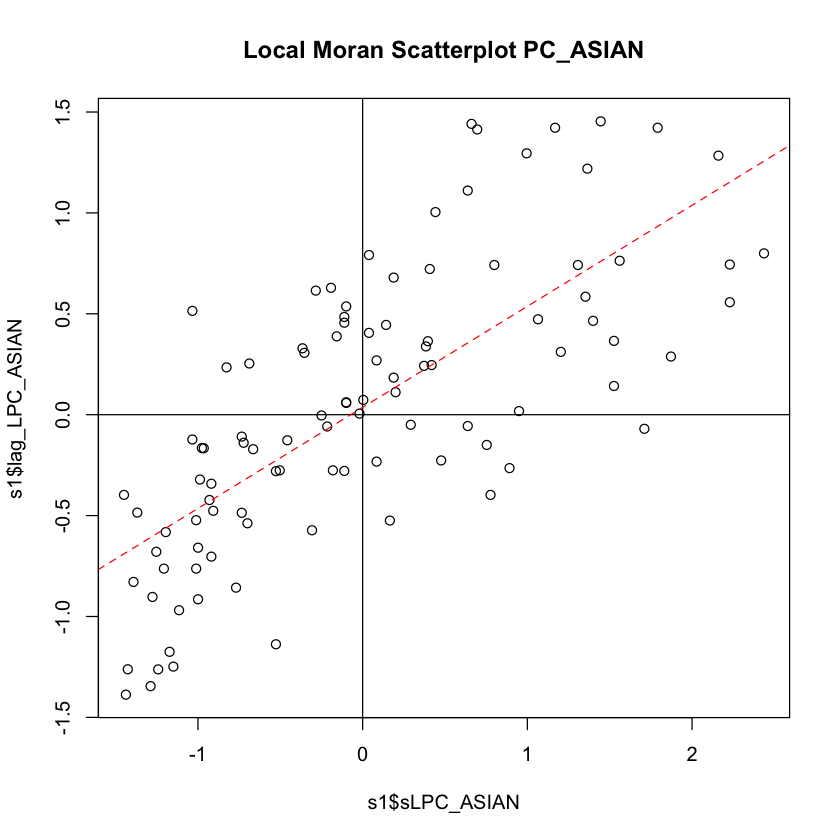

In [37]:
s1$sLPC_ASIAN <- scale(s1$PC_ASIAN) 

s1$lag_LPC_ASIAN <- lag.listw(lw, s1$sLPC_ASIAN,zero.policy=TRUE)

plot(x = s1$sLPC_ASIAN, y = s1$lag_LPC_ASIAN, main = "Local Moran Scatterplot PC_ASIAN")
abline(h = 0, v = 0)
abline(lm(s1$lag_LPC_ASIAN ~ s1$sLPC_ASIAN), lty = 2, lwd = 1, col = "red")

#Note that the slope of the regression line is nearly the same as Moran's I
slope <- lm(s1$lag_LPC_ASIAN ~ s1$sLPC_ASIAN)
coefficients(slope)[2]


In [34]:
# identify the moran plot quadrant for each observation to make the cluster map
s1$QUAD_SIG <- NA
s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 1
s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 2
s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 3
s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 4
s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "QUAD_SIG"] <- 5  
#5 are non significant observations

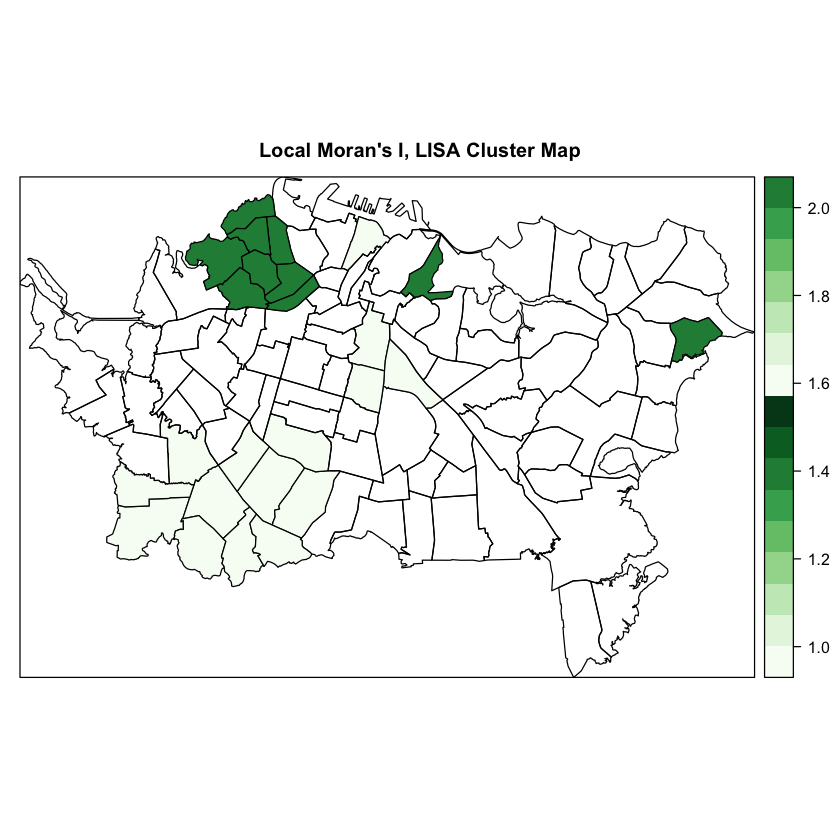

In [35]:

# Set the breaks for the thematic map classes
# We use the seq function to generation a sequence from 1-5, going up by 1.
# you could also use 
breaks <- c(1,2,3,4,5)

# Set the corresponding labels for the thematic map classes
labels <- c("high-High", "low-Low", "High-Low", "Low-High", "Not Signif.")

# Define color swatches
pal  <- brewer.pal(length(brks), "Greens")

#colors <- c("red", "blue", "lightpink", "skyblue2", "white")

# Generate the map
spplot(s1, z="QUAD_SIG",
        col.regions=pal, main=list(label="Local Moran's I, LISA Cluster Map",cex=1))

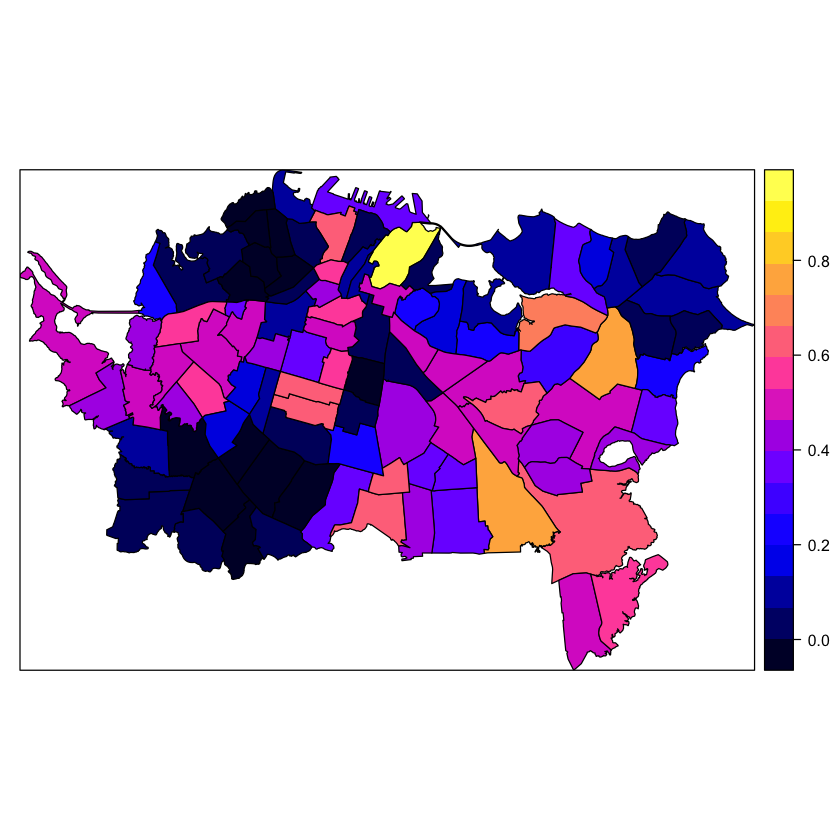

In [36]:
# identify the moran plot quadrant for each observation to make the P-significance cluster map
s1$P_SIG <- 0
s1$P_SIGB <- 0
#locm[, 5]
#s1$sLPC_ASIAN >= 0 
#s1$lag_LPC_ASIAN
#locm[,5]
#locm

s1@data['P_SIG'] <- locm[, 5]

#breaks <- findInterval(s1$P_SIG, breaks)

#breaks <- c(0,0.0001,0.001,0.01,0.05)
#breaks <- classIntervals(s1$P_SIG, n=5, style="fixed", fixedBreaks=c(0.0001,0.001,0.01,0.05))
#pal  <- colorRampPalette(brewer.pal(breaks, "Greens"))
#classIntervals(s1$PC_ASIAN, n = 7, style = "equal")$brks

#spplot(s1, c('P_SIG'), cut)
spplot(s1, z='P_SIG') 
#main=list(label="Local Moran's I, LISA Cluster Map",cex=1))
#s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 1
#s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 2
#s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 3
#s1@data[(s1$sLPC_ASIAN >= 0 & s1$lag_LPC_ASIAN <= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 4
#s1@data[(s1$sLPC_ASIAN <= 0 & s1$lag_LPC_ASIAN >= 0) & (locm[, 5] <= 0.05), "P_SIG"] <- 5 

#s1@data